# Polynomial Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data

In [2]:
# df = pd.read_csv('data/gdp4c.csv')
df = pd.read_csv('data/gdp4c.csv', index_col=0)
df.head()              # NaN = Not a Number

,SGP,THA,USA,VNM
1960,704462302.4,2.760747e+09,5.433000e+11,NaN
1961,764308114.5,3.034044e+09,5.633000e+11,NaN
1962,825885273.7,3.308913e+09,6.051000e+11,NaN
1963,917222004.4,3.540403e+09,6.386000e+11,NaN
1964,893734483.2,3.889130e+09,6.858000e+11,NaN


In [3]:
df.tail()

,SGP,THA,USA,VNM
2013,3.044540e+11,4.203330e+11,1.669150e+13,1.712220e+11
2014,3.115390e+11,4.073390e+11,1.742760e+13,1.862050e+11
2015,3.040980e+11,4.013990e+11,1.812070e+13,1.932410e+11
2016,3.097640e+11,4.117550e+11,1.862450e+13,2.052760e+11
2017,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [4]:
df.describe()

,SGP,THA,USA,VNM
count,5.800000e+01,5.800000e+01,5.800000e+01,3.300000e+01
mean,8.043585e+10,1.227440e+11,6.991516e+12,6.878553e+10
std,1.007247e+11,1.353708e+11,5.857794e+12,6.664636e+10
min,7.044623e+08,2.760747e+09,5.433000e+11,6.293305e+09
25%,5.320927e+09,1.399794e+10,1.583852e+12,2.465747e+10
50%,2.788040e+10,6.695904e+10,5.455160e+12,3.506411e+10
75%,9.937334e+10,1.719910e+11,1.137740e+13,1.060150e+11
max,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [5]:
df.shape        # มิติข้อมูล

(58, 4)

In [6]:
# ตรวจสอบว่ามีข้อมูลสูญหายหรือไม่? Check missing data
df.isnull().sum()

SGP     0
THA     0
USA     0
VNM    25
dtype: int64

### Data Visualization

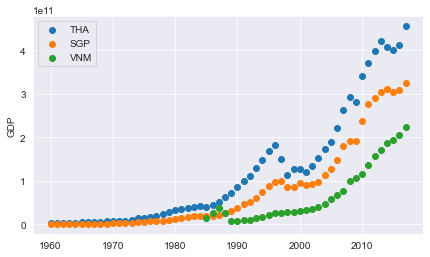

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,4))
plt.scatter(df.index, df.THA, label='THA')
plt.scatter(df.index, df.SGP, label='SGP')
plt.scatter(df.index, df.VNM, label='VNM')
plt.ylabel('GDP')
plt.legend()
plt.show()

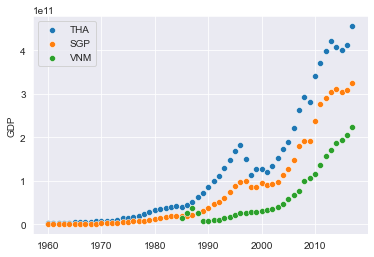

In [8]:
sns.set_style('darkgrid')
sns.scatterplot(data=df, x=df.index, y='THA', label='THA')
sns.scatterplot(data=df, x=df.index, y='SGP', label='SGP')
sns.scatterplot(data=df, x=df.index, y='VNM', label='VNM')
plt.ylabel('GDP')
plt.show()

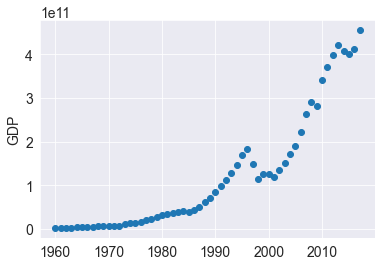

In [9]:
plt.rcParams.update({'font.size':14})  
plt.scatter(df.index, df.THA)
plt.ylabel('GDP')
plt.show()

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
df.head()

,SGP,THA,USA,VNM
1960,704462302.4,2.760747e+09,5.433000e+11,NaN
1961,764308114.5,3.034044e+09,5.633000e+11,NaN
1962,825885273.7,3.308913e+09,6.051000e+11,NaN
1963,917222004.4,3.540403e+09,6.386000e+11,NaN
1964,893734483.2,3.889130e+09,6.858000e+11,NaN


In [13]:
x = df.index
x[:5]

Int64Index([1960, 1961, 1962, 1963, 1964], dtype='int64')

In [14]:
x = df.index.values.reshape(-1, 1)
x[:5]

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964]], dtype=int64)

In [15]:
y = df.THA
y[:5]

1960    2.760747e+09
1961    3.034044e+09
1962    3.308913e+09
1963    3.540403e+09
1964    3.889130e+09
Name: THA, dtype: float64

In [16]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

### ประเมิน (Evaluation)

In [17]:
model.score(x, y)   # ประเมิน (Evaluate the Model)

0.8129995489142143

### Visualize model

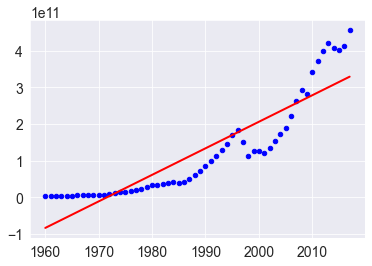

In [18]:
y_predict = model.predict(x)

plt.scatter(x, y, color='b',s=20)  # ข้อมูลจริง     # color, size
plt.plot(x, y_predict, linewidth='2', color='r')   # model

plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
mean_squared_error(y, y_predict)

3.367746040591713e+21

In [21]:
mean_absolute_error(y, y_predict)

48790601316.37217

In [22]:
np.sqrt(mean_squared_error(y, y_predict))

58032284468.14508

In [23]:
print('R2 = {:.5f} '.format(model.score(x, y)))
print('R2 = {:.5f} '.format(r2_score(y, y_predict)))

print('MSE = {:.4e} '.format(mean_squared_error(y, y_predict)))
print('RMSE = {:.4e} '.format(np.sqrt(mean_squared_error(y, y_predict))))

R2 = 0.81300 
R2 = 0.81300 
MSE = 3.3677e+21 
RMSE = 5.8032e+10 


### ทำนาย (Predict)

In [24]:
y_predict = model.predict([[2020]])  # GDP ใน ปี 2020 มีค่าเท่าใด

y_predict[0]
# 

print('{:,.0f} '.format(y_predict[0]))
print('{:,.6E} '.format(y_predict[0]))

350,427,351,989 
3.504274E+11 


In [25]:
x_input = [2010, 2015, 2017, 2020]
x_input = np.array(x_input).reshape(-1, 1)
# x_input =  [[2010], 
#             [2015], 
#             [2017], 
#             [2020]]
y_predict = model.predict(x_input)
y_predict

array([2.78146930e+11, 3.14287141e+11, 3.28743225e+11, 3.50427352e+11])

In [26]:
x_input

array([[2010],
       [2015],
       [2017],
       [2020]])

In [27]:
for val in y_predict:
    print('{:.4e}'.format(val))

2.7815e+11
3.1429e+11
3.2874e+11
3.5043e+11


In [28]:
for i, val in enumerate(y_predict):
    # print(i, x_input[i] , val)
    print(f'{i} {x_input[i]} {val:.4e}')

0 [2010] 2.7815e+11
1 [2015] 3.1429e+11
2 [2017] 3.2874e+11
3 [2020] 3.5043e+11


In [29]:
df.THA.tail(8)

2010    3.411050e+11
2011    3.708190e+11
2012    3.975580e+11
2013    4.203330e+11
2014    4.073390e+11
2015    4.013990e+11
2016    4.117550e+11
2017    4.552210e+11
Name: THA, dtype: float64

## Polynomial Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [31]:
x = df.index
x[:5]

Int64Index([1960, 1961, 1962, 1963, 1964], dtype='int64')

In [32]:
x = df.index.values.reshape(-1, 1)
x[:5]

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964]], dtype=int64)

In [33]:
y = df.THA

In [34]:
poly_features = PolynomialFeatures(degree=2)  ## Degrees
x_poly = poly_features.fit_transform(x)

In [39]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

### ประเมิน (Evaluation)

In [36]:
model.score(x_poly, y)

0.9579681384317312

### Visualize Model

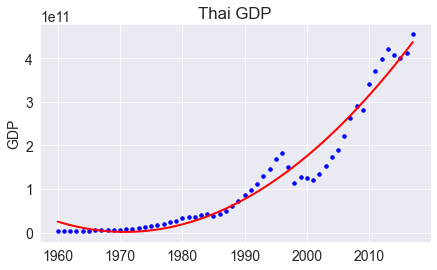

In [37]:
y_poly_pred = model.predict(x_poly)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 7,4  

plt.scatter(x, y, color='b',s=12) 
plt.plot(x, y_poly_pred, linewidth='2', color='r') 
plt.ylabel('GDP')
plt.title('Thai GDP')

plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print('R2 = {:.5f} '.format(model.score(x_poly, y)))
print('R2 = {:.5f} '.format(r2_score(y, y_poly_pred)))

print('MSE = {:.4e} '.format(mean_squared_error(y, y_poly_pred)))
print('RMSE = {:.4e} '.format(np.sqrt(mean_squared_error(y,  y_poly_pred))))

R2 = 0.95797 
R2 = 0.95797 
MSE = 7.5696e+20 
RMSE = 2.7513e+10 


### ทำนาย (Predict)

In [40]:
x_input = [2010, 2015, 2017, 2020]
x_input = np.array(x_input).reshape(-1, 1)

# x_input = [[2010], [2015], [2018], [2020]]  # เขียนแบบนี้ก็ได้

x_input_poly = poly_features.fit_transform(x_input)
y_poly_pred = model.predict(x_input_poly)
y_poly_pred

for val in y_poly_pred:
    print('{:.4e}'.format(val))

3.1526e+11
4.0035e+11
4.3724e+11
4.9563e+11


In [41]:
for i, val in enumerate(y_poly_pred):
    # print(i, x_input[i] , val)
    print(f'{i} {x_input[i]} = {val :.4e}')   

0 [2010] = 3.1526e+11
1 [2015] = 4.0035e+11
2 [2017] = 4.3724e+11
3 [2020] = 4.9563e+11


In [42]:
df.THA.tail(8)

2010    3.411050e+11
2011    3.708190e+11
2012    3.975580e+11
2013    4.203330e+11
2014    4.073390e+11
2015    4.013990e+11
2016    4.117550e+11
2017    4.552210e+11
Name: THA, dtype: float64

In [43]:
print('    Year     Linear    Polynomial')
print('----------------------------------')
for i, val in enumerate(y_poly_pred):
    # print(i, x_input[i] , val)
    print(f'{i}  {x_input[i]}  {y_predict[i] :.4e}  {val :.4e}') 

    Year     Linear    Polynomial
----------------------------------
0  [2010]  2.7815e+11  3.1526e+11
1  [2015]  3.1429e+11  4.0035e+11
2  [2017]  3.2874e+11  4.3724e+11
3  [2020]  3.5043e+11  4.9563e+11


### เปรียบเทียบกับค่า GDP จริง ปี2020

In [44]:
# Polynomial Regression

gdp_p = 495.6e9     # gdp_p = 4.9563e11
gdp_a = 501.8e9

err = (gdp_a - gdp_p) / gdp_a * 100
print(f'Diff: {err:.2f} %')

Diff: 1.24 %


In [45]:
# Linear
gdp_p = 350.42e9
err = (gdp_a - gdp_p) / gdp_a * 100
print(f'Diff: {err:.2f} %')

Diff: 30.17 %


## Assignment
- Try degrees 3 4 .. 
- Try VNM

In [46]:
# df.dropna() 
df.dropna(axis=0)   # or this

df.dropna(axis=0, inplace=True)

In [ ]:
df.head()

In [ ]:
# ตรวจสอบว่ามีข้อมูลสูญหายหรือไม่? Check missing data
df.isnull().sum()

In [ ]:
df.shape